In [1]:
#https://machine-learning-python.kspax.io/Classification/ex1_Recognizing_hand-written_digits.html
from sklearn import datasets, svm, metrics

In [2]:
digits = datasets.load_digits()

In [3]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

data (1797, 64)
target (1797,)
frame
feature_names
target_names (10,)
images (1797, 8, 8)
DESCR


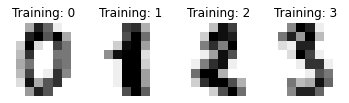

In [4]:
import matplotlib.pyplot as plt
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [5]:
n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
data = digits.images.reshape((n_samples, -1))
train_data = data[:n_samples // 2]
test_data = data[n_samples // 2:]
train_labels = digits.target[:n_samples // 2]
test_labels = digits.target[n_samples // 2:]


# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(train_data, train_labels)

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(test_data)

In [6]:
test_data[0]

array([ 0.,  0.,  1., 11., 14., 15.,  3.,  0.,  0.,  1., 13., 16., 12.,
       16.,  8.,  0.,  0.,  8., 16.,  4.,  6., 16.,  5.,  0.,  0.,  5.,
       15., 11., 13., 14.,  0.,  0.,  0.,  0.,  2., 12., 16., 13.,  0.,
        0.,  0.,  0.,  0., 13., 16., 16.,  6.,  0.,  0.,  0.,  0., 16.,
       16., 16.,  7.,  0.,  0.,  0.,  0., 11., 13., 12.,  1.,  0.])

In [7]:
test_labels[0]

8

In [8]:
list(set(test_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
import ROOT
from ROOT import TH1D, TH2D, TCanvas

Welcome to JupyROOT 6.26/04


In [10]:
h1_pred = TH1D("h1_pred", "Count vs Predicted Number", 10, -0.5, 9.5)
h1_label = TH1D("h1_label", "Count vs Real Number", 10, -0.5, 9.5)
h2_label_vs_pred = TH2D("h2_label_vs_pred", "Count on (pred,real)", 10, -0.5, 9.5, 10, -0.5, 9.5)

for idx in range(0,len(predicted)):
    h1_pred.Fill( predicted[idx] )
    h1_label.Fill( test_labels[idx] )
    h2_label_vs_pred.Fill( predicted[idx], test_labels[idx] )

In [11]:
c1 = TCanvas("c1","",800,600)
c1.SetGridx(1)
c1.SetGridy(1)

In [12]:
%jsroot on
h1_label.SetMinimum(0)
if (h1_pred.GetMaximum()>h1_label.GetMaximum()):
    h1_label.SetMaximum(h1_pred.GetMaximum())

h1_label.Draw("HIST")
h1_pred.SetLineColor(2)
h1_pred.SetLineStyle(2)
h1_pred.Draw("HISTSAME")
c1.Draw()

In [13]:
h2_label_vs_pred.Draw("colz")
c1.Draw()